# COURSE  

## Ссылки

* https://course.fast.ai/
* https://course.fast.ai/Lessons/lesson1.html
* https://github.com/fastai/fastbook

## Авторы

- dev
- math

## Организация курса

- лекции
- книга в виде notebooks

## Подход к обучению

Подход сверху-вниз (learn with a context in place)

# Deep learning

## Отличие от классического ML

<img src="images/dl.png" width="600">

## Мифы

<img src="images/myths.png" width="600">

## PyTorch vs TensorFlow

<img src="images/pytorch.png" width="600">

## PyTorch

* Простой и быстрый
* Лучший фреймворк для низкоуровневой разработки
* fastai - самая популярная высокоуровневая библиотека поверх PyTorch

## Нейрон

Модель нейрона была описана еще 1943 году
<img src="images/neuron.png" width="600">

## 80-ые

* Нейронки с 2 слоями нейронов
* Теория расходилась с практикой - 2 слоев было мало

## Теорема Цыбенко, Универсальная теорема аппроксимации

Теорема, доказанная Джорджем Цыбенко в 1989 году, которая утверждает, что искусственная нейронная сеть прямой связи (англ. feed-forward; в которых связи не образуют циклов) с одним скрытым слоем может аппроксимировать любую непрерывную функцию многих переменных с любой точностью.

# Практика

## Мега-задача

1. A dataset called the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) that contains 7,349 images of cats and dogs from 37 different breeds will be downloaded from the fast.ai datasets collection to the GPU server you are using, and will then be extracted.
2. A *pretrained model* that has already been trained on 1.3 million images, using a competition-winning model will be downloaded from the internet.
3. The pretrained model will be *fine-tuned* using the latest advances in transfer learning, to create a model that is specially customized for recognizing dogs and cats.

In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [4]:
# Labels cats based on a filename rule provided by the dataset creators
# 
# Computer vision datasets are normally structured in such a way 
# that the label for an image is part of the filename, or path—most commonly the parent folder name.
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func( # image loader
    path, 
    get_image_files(path), 
    valid_pct=0.2, # validation set, selected randomly
    seed=42,
    label_func=is_cat, 
    # a transform contains code that is applied automatically during training
    item_tfms=Resize(224) 
)

learn = vision_learner(
    dls, 
    # convolutional neural network (CNN) 
    # current state-of-the-art approach to creating computer vision models
    # 
    # Models using architectures with more layers take longer to train, and are more prone to overfitting
    # But when using more data, they can be quite a bit more accurate.
    resnet34, 
    # tells you what percentage of images in the validation set are being classified incorrectly. 
    # Another common metric for classification is accuracy (which is just 1.0 - error_rate).
    metrics=error_rate,
    pretrained=True # default
)

learn.fine_tune(1)

/Users/sakorzhnev/mlc/env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/sakorzhnev/mlc/env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.187227,0.025155,0.007442,02:41


epoch,train_loss,valid_loss,error_rate,time
0,0.048267,0.020680,0.008119,05:52


In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [8]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## Overfitting x**2

<img src="images/att_00000.png" alt="Example of overfitting" caption="Example of overfitting" id="img_overfit" width="700">

* You will learn many methods to avoid overfitting in this book. 
* However, you should only use those methods **after you have confirmed that overfitting is actually occurring** (i.e., you have actually observed the validation accuracy getting worse during training). 
* We often see practitioners using over-fitting avoidance techniques even when they have enough data that they didn't need to do so, ending up with a model that may be less accurate than what they could have achieved.

## Разница между error_rate и loss

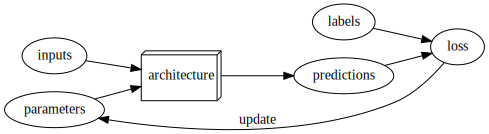

In [9]:
#hide_input
#caption Detailed training loop
#id detailed_loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

* The entire purpose of **loss** is to define a **"measure of performance"** that the training system can use to **update weights automatically**. 
* In other words, a **good choice for loss** is a choice that is **easy for stochastic gradient descent to use**. 
* But a **metric** is defined for human consumption, so **a good metric is** one that is **easy for you to understand**, and that hews as closely as possible to what you want the model to do. 
* At times, you might decide that the **loss** function is a **suitable metric**, but that is **not necessarily** the case.

## Pretrained model

* Модель уже с весами, установленными в результате тренировки на 1.3 million photos на [*ImageNet* dataset](http://www.image-net.org/)
* You should nearly always use a pretrained model, так как она уже полезна
* For instance, parts of pretrained models will handle edge, gradient, and color detection, which are needed for many tasks.

When using a pretrained model, `vision_learner` will **remove the last layer**, since that is always specifically **customized to the original training task** (i.e. ImageNet dataset classification), and replace it with one or more **new layers** with **randomized** weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the *head*.

## Pretrained model. Преимущества

* Allow us to train more accurate models, 
* more quickly, 
* with less data, 
* and less time and money

В большинстве обучающих материалов эта тема не затрагивается и не раскрывается. 

> jargon: Transfer learning: Using a pretrained model for a task different to what it was originally trained for.

## fine_tune

As we've discussed, the **architecture** only describes a **template** for a mathematical function; it doesn't actually do anything until we provide values for the millions of parameters it contains.

But why is the method called `fine_tune`, and not `fit`? fastai actually *does* have a method called `fit`, which does indeed **fit** a model (**i.e. look at images in the training set multiple times**, each time updating the parameters to make the predictions closer and closer to the target labels). But in this case, we've **started with a pretrained model**, and we **don't want to throw away** all those capabilities that it already has. As you'll learn in this book, there are some important tricks to adapt a pretrained model for a new dataset—a process called **fine-tuning**.